In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,recall_score
from sklearn.model_selection import GridSearchCV,StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')
#nltk.download('all')

In [2]:
# Reading the dataset
wiki_data=pd.read_csv("train.csv")
wiki_data.shape

(5000, 3)

##### The dataset has 5000 observations and 3 columns

In [3]:
#Inspecting the data
wiki_data.head(3)

,id,comment_text,toxic
0,e617e2489abe9bca,"""\r\n\r\n A barnstar for you! \r\n\r\n The De...",0
1,9250cf637294e09d,"""\r\n\r\nThis seems unbalanced. whatever I ha...",0
2,ce1aa4592d5240ca,"Marya Dzmitruk was born in Minsk, Belarus in M...",0


In [4]:
# making an array of all comments for further processing
wiki_comments=wiki_data.comment_text.values

In [5]:
wiki_comments[11:15]

array(['of course, here you go [1] [2] [3] [4] What kind of references are you looking for?\r\n\r\nTHANK YOU!\r\nNr 3 is perfect. Than we have both Gyulai and Csabai. The problem is that I never discovered how to add files to the article...',
       'put a bigger delay in please \r\n\r\nEven if I try to zoom back seconds later to fix my failure, I get ECed.  Make a longer delay please (bot is annoying enough).71.127.137.171',
       'YES/ Poland and Lithuania define marriage as a union between a man and a woman in thay constitutions just as several other countries in Europe e.g. Spain, France etc. They are not mentioned here. Why? \r\nAnd Latvia not only define marriage as a union between a man and a woman in its civil law and constitution (since 2006) but also bans same sex marriages in those acts. So it is the only country in Europe to do so. (first to BANN same sex marriage, and NOT third to define marriage...)\r\nThis article sugests that Poland and Lithuania do the same. and this 

## Cleanup process:

In [6]:
# removing special letters
pattern1="\r\n\s+"
pattern2="\@"
pattern3="https://\S+" #removing URLs
pattern4="\d+\.\d+" # removing IP address
pattern5="\r\n"
pattern6="\("
pattern7="\)"
pattern8="\[ \]"

wiki_comments=[i.lower() for i in wiki_comments] # case normalization
wiki_comments=[re.sub(pattern1," ",i) for i in wiki_comments]
wiki_comments=[re.sub(pattern2," ",i) for i in wiki_comments]
wiki_comments=[re.sub(pattern3," ",i) for i in wiki_comments]
wiki_comments=[re.sub(pattern4," ",i) for i in wiki_comments]
wiki_comments=[re.sub(pattern5," ",i) for i in wiki_comments]
wiki_comments=[re.sub(pattern6," ",i) for i in wiki_comments]
wiki_comments=[re.sub(pattern7," ",i) for i in wiki_comments]
wiki_comments=[re.sub(pattern8," ",i) for i in wiki_comments]

In [7]:
wiki_comments[11:15]

['of course, here you go [1] [2] [3] [4] what kind of references are you looking for? thank you! nr 3 is perfect. than we have both gyulai and csabai. the problem is that i never discovered how to add files to the article...',
 'put a bigger delay in please  even if i try to zoom back seconds later to fix my failure, i get eced.  make a longer delay please  bot is annoying enough . . ',
 'yes/ poland and lithuania define marriage as a union between a man and a woman in thay constitutions just as several other countries in europe e.g. spain, france etc. they are not mentioned here. why?  and latvia not only define marriage as a union between a man and a woman in its civil law and constitution  since 2006  but also bans same sex marriages in those acts. so it is the only country in europe to do so.  first to bann same sex marriage, and not third to define marriage...  this article sugests that poland and lithuania do the same. and this is not truth! so, i say about it. in my opinion, it 

# Tokenization

In [8]:
wiki_comments_tkn=[word_tokenize(i) for i in wiki_comments]

In [9]:
print(wiki_comments_tkn[:2])

[['``', 'a', 'barnstar', 'for', 'you', '!', 'the', 'defender', 'of', 'the', 'wiki', 'barnstar', 'i', 'like', 'your', 'edit', 'on', 'the', 'kayastha', 'page', '.', 'lets', 'form', 'a', 'solidarity', 'group', 'against', 'those', 'who', 'malign', 'the', 'article', 'and', 'its', 'subject', 'matter', '.', 'i', 'propose', 'the', 'folloing', 'name', 'for', 'the', 'group', '.', 'united', 'intellectuals', "'", 'front', 'of', 'kayastha', 'ethinicty', 'against', 'racist', 'or', 'castist', 'abuse', 'uifkearca', '``'], ['``', 'this', 'seems', 'unbalanced', '.', 'whatever', 'i', 'have', 'said', 'about', 'mathsci', ',', 'he', 'has', 'said', 'far', 'more', 'extreme', 'and', 'unpleasant', 'things', 'about', 'me', 'not', 'to', 'mention', 'others', ',', 'and', 'with', 'much', 'greater', 'frequency', '.', 'i', "'m", 'more', 'than', 'happy', 'to', 'reign', 'myself', 'in', ',', 'if', 'that', "'s", 'what', 'you', "'d", 'like', 'ruth', 'be', 'told', ',', 'i', 'was', 'just', 'trying', 'to', 'get', 'mathsci', '

# Removing Stop words and Punctuations

In [10]:
stp_wrd=list(stopwords.words('english'))
punct=list(punctuation)
addional_pattern=['...',"'","'\'",'``']

final_stop_list=stp_wrd+punct+addional_pattern

In [11]:
print(final_stop_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
# defining function for removing stopwords and punctuations
def clean_txt(txt):
    return [j for j in txt if j not in final_stop_list]          

In [13]:
wiki_comments_tkn_clean=[clean_txt(txt )for txt in wiki_comments_tkn]

In [14]:
print(wiki_comments_tkn_clean[:2])

[['barnstar', 'defender', 'wiki', 'barnstar', 'like', 'edit', 'kayastha', 'page', 'lets', 'form', 'solidarity', 'group', 'malign', 'article', 'subject', 'matter', 'propose', 'folloing', 'name', 'group', 'united', 'intellectuals', 'front', 'kayastha', 'ethinicty', 'racist', 'castist', 'abuse', 'uifkearca'], ['seems', 'unbalanced', 'whatever', 'said', 'mathsci', 'said', 'far', 'extreme', 'unpleasant', 'things', 'mention', 'others', 'much', 'greater', 'frequency', "'m", 'happy', 'reign', "'s", "'d", 'like', 'ruth', 'told', 'trying', 'get', 'mathsci', 'pay', 'attention', 'stop', 'uncivil', 'would', 'expect', 'issue', 'request', 'mathsci', 'intentionally', 'unbalanced', 'whatever', 'reason', 'please', 'let', 'know', 'voluntarily', 'close', 'account', 'move', 'things', 'like', 'wikipedia', 'lot', 'contribute', 'way', 'point', 'contributing', 'project', 'editors', 'administrative', 'leave', 'aggressively', 'rude', "'m", 'good', 'editor', "n't", 'really', 'deserve', 'people', 'riding', 'ass', 

In [15]:
# Preparing 1 whole list from list of lists for counter
counter_lst=[]
for i in wiki_comments_tkn_clean:
    for j in i:
        counter_lst.append(j)    

In [16]:
cntr=Counter(counter_lst)

In [17]:
cntr.most_common(15)

[("'s", 1989),
 ("n't", 1795),
 ('article', 1714),
 ('page', 1501),
 ('wikipedia', 1424),
 ('talk', 1169),
 ('please', 1039),
 ('would', 1007),
 ('ass', 986),
 ('fuck', 905),
 ('one', 861),
 ('like', 836),
 ('also', 657),
 ('see', 631),
 ('think', 630)]

In [18]:
#preparing the list of contenxtual words
contextual_words=["'s","n't",'article','page','wikipedia','wiki']

In [19]:
def remove_context(txt):
    return[i for i in txt if i not in contextual_words]

wiki_comments_tkn_clean=[remove_context(txt) for txt in wiki_comments_tkn_clean]

In [20]:
print(wiki_comments_tkn_clean[:1])

[['barnstar', 'defender', 'barnstar', 'like', 'edit', 'kayastha', 'lets', 'form', 'solidarity', 'group', 'malign', 'subject', 'matter', 'propose', 'folloing', 'name', 'group', 'united', 'intellectuals', 'front', 'kayastha', 'ethinicty', 'racist', 'castist', 'abuse', 'uifkearca']]


# creating Tf-idf matrix and dividing the data in train and test

In [21]:
wiki_comments_tkn_clean=[" ".join(i) for i in wiki_comments_tkn_clean]

In [22]:
wiki_comments_tkn_clean[:2]

['barnstar defender barnstar like edit kayastha lets form solidarity group malign subject matter propose folloing name group united intellectuals front kayastha ethinicty racist castist abuse uifkearca',
 "seems unbalanced whatever said mathsci said far extreme unpleasant things mention others much greater frequency 'm happy reign 'd like ruth told trying get mathsci pay attention stop uncivil would expect issue request mathsci intentionally unbalanced whatever reason please let know voluntarily close account move things like lot contribute way point contributing project editors administrative leave aggressively rude 'm good editor really deserve people riding ass every time try certain things 'll happily leave hands drama-prone think best ludwigs2"]

In [23]:
X=wiki_comments_tkn_clean
Y=wiki_data.toxic

In [24]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [25]:
x_train[:2]

['p.s.you really something life looked around userpage anda monastic deacon catholic church catholic church wow things work good luck maybe could even one day rise rank archdeacon keyn eynhore sorry forgot speak english jolz gutentag goyishe kup',
 'ca ca create best friend']

In [26]:
# Tf-idf vectorizer
tfidf_vect=TfidfVectorizer(max_features=4000)

In [27]:
x_train_vect=tfidf_vect.fit_transform(x_train)
x_test_vect=tfidf_vect.transform(x_test)

# Machine learning section

In [28]:
#Creating the instance of model SVC
svc_model=SVC(kernel='linear')

#Training the model with training data
svc_model.fit(x_train_vect,y_train)

# predicting the results with the trained model
svc_pred_test=svc_model.predict(x_test_vect)

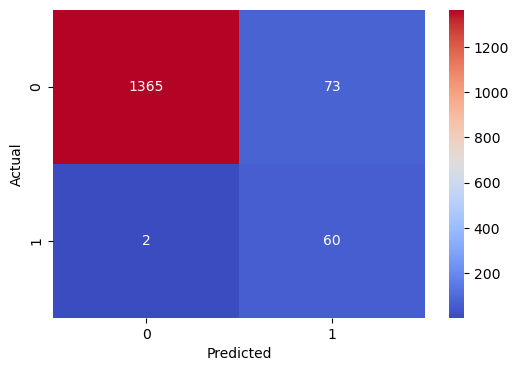

In [29]:
plt.figure(figsize=(6,4))
sbn.heatmap(confusion_matrix(svc_pred_test,y_test),cmap='coolwarm',annot=True,fmt='d') 
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("Confusion matrix_SVC_Before sampling")

In [30]:
print(classification_report(svc_pred_test,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1438
           1       0.45      0.97      0.62        62

    accuracy                           0.95      1500
   macro avg       0.72      0.96      0.79      1500
weighted avg       0.98      0.95      0.96      1500



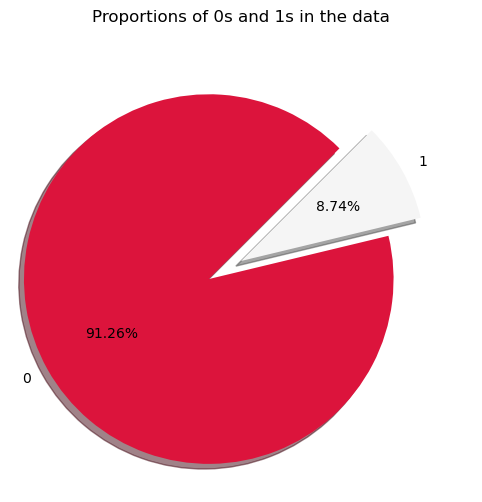

In [31]:
# we will analyze the 1's and 0's portion-if there is any class imbalance
size=Y.value_counts(sort=True)
label=Y.value_counts(sort=True).index
color=['crimson','whitesmoke']
explode=(0.2,0)
plt.figure(figsize=(8,6))
plt.pie(size,labels=label,colors=color,radius=1,explode=explode,autopct='%1.2f%%',shadow=True,startangle=45)
plt.title("Proportions of 0s and 1s in the data")
plt.savefig("Proportions of 0s and 1s in the data")

### From the above figure we can see that the data is highly imbalanced

## We will use gridsearch and strtified sampling to see if we can get better result



In [32]:
#creating then instance of stratifiedkfold
sfk=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

X_vect=tfidf_vect.fit_transform(X)

#getting the splits

for train_index,test_index in sfk.split(X_vect,Y):
    x_train,x_test=X_vect[train_index],X_vect[test_index]
    y_train,y_test=Y[train_index],Y[test_index]
    
    

In [33]:
# We will define hyperparameters

hyper_parameters={'C':[100,0,200,1000,300],'class_weight':['balanced',None]}

gscv=GridSearchCV(svc_model,hyper_parameters,scoring='recall',cv=5)

gscv.fit(x_train,y_train)



GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [100, 0, 200, 1000, 300],
                         'class_weight': ['balanced', None]},
             scoring='recall')

In [34]:
print(gscv.best_params_)
print(gscv.best_score_)

{'C': 100, 'class_weight': 'balanced'}
0.6563561076604554


In [35]:
#Creating the instance of model SVC
svc_model_1=SVC(kernel='linear',**gscv.best_params_)

#Training the model with training data
svc_model_1.fit(x_train,y_train)

# predicting the results with the trained model
svc_pred_test_1=svc_model_1.predict(x_test)

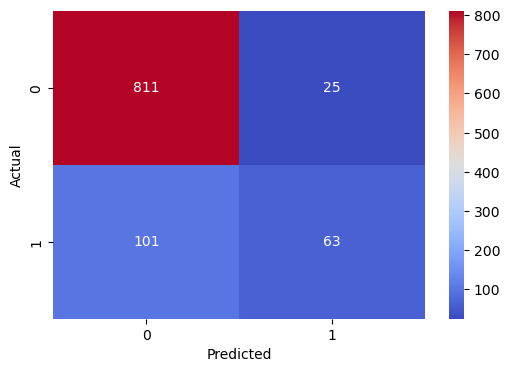

In [36]:
plt.figure(figsize=(6,4))
sbn.heatmap(confusion_matrix(svc_pred_test_1,y_test),cmap='coolwarm',annot=True,fmt='d') 
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("Confusion matrix_SVC_after sampling")

In [37]:
print(classification_report(svc_pred_test_1,y_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       836
           1       0.72      0.38      0.50       164

    accuracy                           0.87      1000
   macro avg       0.80      0.68      0.71      1000
weighted avg       0.86      0.87      0.86      1000



# We will use logistic regression to see if we get better result

In [38]:
x_train_log,x_test_log,y_train_log,y_test_log=train_test_split(X,Y,test_size=0.3,random_state=42)

x_train_log_vect=tfidf_vect.fit_transform(x_train_log)
x_test_log_vect=tfidf_vect.transform(x_test_log)

In [39]:
log_reg_model=LogisticRegression()

hyper_param={'C':[10,100,200,500,1000],'class_weight':['balanced',None],'penalty':['l1','l2']}

gscv_log=GridSearchCV(log_reg_model, hyper_param,scoring='recall',cv=5)

gscv_log.fit(x_train_log_vect,y_train_log)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [10, 100, 200, 500, 1000],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [40]:
print(gscv_log.best_params_)
print(gscv_log.best_score_)

{'C': 500, 'class_weight': 'balanced', 'penalty': 'l2'}
0.6020765027322403


# Conslcusion: We are getting bgetter results with SVC before sampling